#Step 1
Environment Setup

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
# !cp /content/drive/MyDrive/14795/SAML-D.csv /content
!git clone https://github.com/Yichuan0712/14795-AML.git

Cloning into '14795-AML'...
remote: Enumerating objects: 310, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 310 (delta 43), reused 74 (delta 25), pack-reused 215 (from 1)
Receiving objects: 100% (310/310), 4.66 MiB | 18.01 MiB/s, done.
Resolving deltas: 100% (135/135), done.


In [2]:
import os
os.chdir('/content/14795-AML')

In [39]:
!git pull origin main

From https://github.com/Yichuan0712/14795-AML
 * branch            main       -> FETCH_HEAD
Already up to date.


#Step 2
Test Data Preprocess

In [4]:
from preprocessor.preprocessor import preprocess, get_X_y_scaler
test_data = preprocess('/content/14795-AML/demo/test0.02.csv')
X_test, y_test, _ = get_X_y_scaler(test_data)

#Step 3
Test Data Encode

In [5]:
from encoder.autoencoder import infer_autoencoder
X_encoder = infer_autoencoder(X_test, encoder_path='/content/14795-AML/demo/encoder_model_demo.h5')

5941/5941 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


In [6]:
import pandas as pd
encode_data = pd.concat([X_encoder, y_test.reset_index(drop=True)], axis=1)
X, y, _ = get_X_y_scaler(encode_data)

#Step 4
Test Data Infer

In [43]:
from detector.XGBoost import infer_xgb
y_pred1 = infer_xgb(X, model_path='/content/14795-AML/demo/xgb_model1_demo.joblib')
y_pred2 = infer_xgb(X, model_path='/content/14795-AML/demo/xgb_model2_demo.joblib')
y_pred3 = infer_xgb(X, model_path='/content/14795-AML/demo/xgb_model3_demo.joblib')

In [44]:
import numpy as np
from scipy.stats import mode

predictions = np.vstack([y_pred1, y_pred1, y_pred3])

final_predictions, _ = mode(predictions, axis=0)


final_predictions = final_predictions.flatten()

In [45]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, final_predictions)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 94.45%


Confusion Matrix:
[[179376  10448]
 [   110    164]]


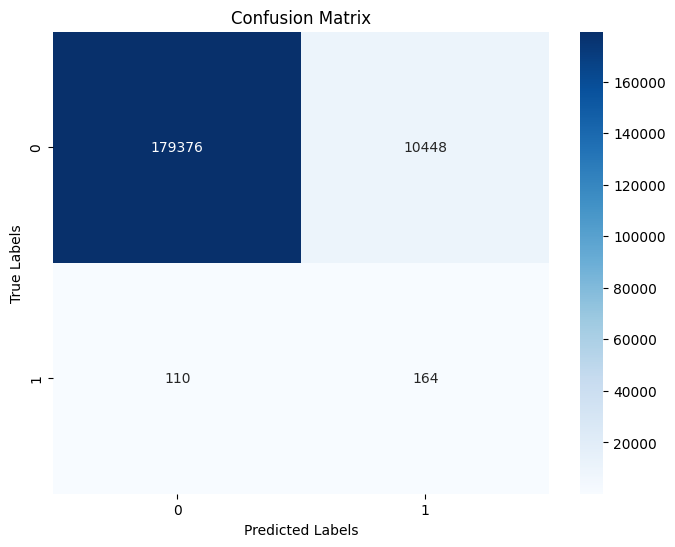

In [46]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, final_predictions)

print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#Step 5
Reporter

In [ ]:
!pip install transformers llama-index

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.8/176.8 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.2/325.2 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing inst

In [ ]:
from reporter.reporter import get_nth_money_laundering, clean_data, run_risk_assessment_chatbot, llama_init

tokenizer, model, device = llama_init()

tokenizer_config.json:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

In [ ]:
ml_df = get_nth_money_laundering(test_data, final_predictions, 0)
alert_message = clean_data(ml_df)

In [ ]:
alert_message

"{'Sender_account': 9588768529.0, 'Receiver_account': 9702680613.0, 'Amount': 3117.45, 'Year': 2023.0, 'Month': 8.0, 'Day': 16.0, 'Hour': 19.0, 'Minute': 53.0, 'Second': 25.0, 'Payment_currency_UK pounds': True, 'Received_currency_UK pounds': True, 'Sender_bank_location_UK': True, 'Receiver_bank_location_UK': True, 'Payment_type_Cheque': True, 'Laundering_type_Normal_Group': True}"

In [ ]:
run_risk_assessment_chatbot(tokenizer,
              model,
              device,
              alert_message,
              system_prompt_path='/content/14795-AML/reporter/system_prompt.txt',
              report_template_path='/content/14795-AML/reporter/report_template.txt')

Welcome to the Anti-Money Laundering Risk Assessment Bot.
We have received an alert message, and the initial report will be generated shortly.
You can review the report and provide feedback for modifications.
Type 'exit' at any time to terminate the session.

Bot: Here is the initial report:
Money Laundering Risk Assessment Report

1. Transaction Overview
Transaction Date: 2023-8-16 19:53:25
Transaction Amount: 3117.45 GBP
Payment Type: Cheque

2. Involved Accounts
Sender Account: 9588768529.0 GBP
Receiver Account: 9702680613.0 GBP

3. Bank Locations
Sender's Bank Location: UK
Receiver's Bank Location: UK

4. Currencies Used
Payment Currency: GBP
Received Currency: GBP

5. Risk Indicators
Laundering Type: Normal Group
Same Country Transaction: True

6. Comments: The transaction involves a large amount of money being transferred from one account to another within the same country. While this does not necessarily indicate money laundering, it is a high-risk transaction that requires furt

SHAP Summary Plot:


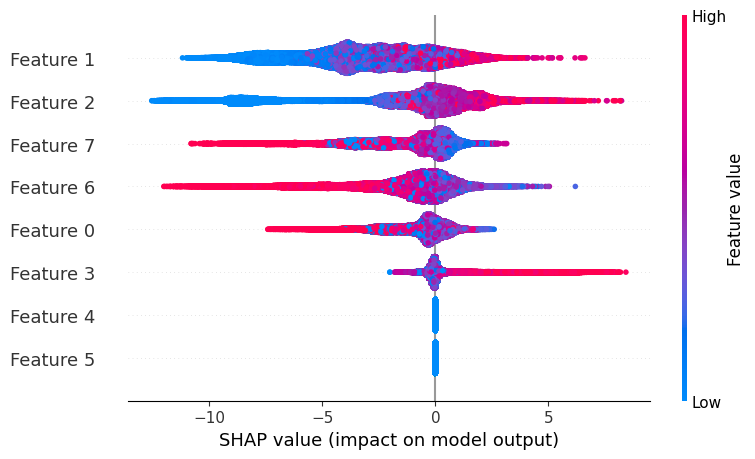

Feature Importance Plot:


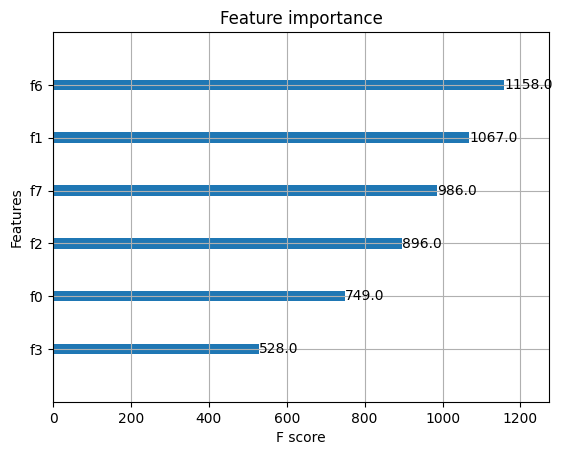

In [77]:
import joblib
import shap
import matplotlib.pyplot as plt
# from lime import lime_tabular
from xgboost import plot_importance
# from sklearn.inspection import plot_partial_dependence

def explain_xgb_demo(X_test, model_path='demo/xgb_model.joblib'):
    xgb_model = joblib.load(model_path)

    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_test)

    print("SHAP Summary Plot:")
    shap.summary_plot(shap_values, X_test)

    print("Feature Importance Plot:")
    plot_importance(xgb_model)
    plt.show()

explain_xgb_demo(X, model_path='/content/14795-AML/demo/xgb_model1_demo.joblib')

In [72]:
X_test.shape

(190098, 107)

In [73]:
X.shape

(190098, 8)

In [75]:
import pandas as pd
import numpy as np

def calculate_amount_correlation(csv_path, X_test):
    df = pd.read_csv(csv_path)

    amount_data = df['Amount'].values

    X_test_df = pd.DataFrame(X_test, columns=[f"f{i}" for i in range(X_test.shape[1])])

    X_test_df['Amount'] = amount_data[:X_test_df.shape[0]]

    correlation_matrix = X_test_df.corr()

    amount_correlation = correlation_matrix['Amount'].drop('Amount').sort_values(ascending=False)

    return amount_correlation

calculate_amount_correlation('/content/14795-AML/demo/test0.02.csv', X)



,Amount
f1,0.043671
f7,-0.009471
f3,-0.011310
f6,-0.025411
f0,-0.026820
f2,-0.040732
f4,NaN
f5,NaN
